# base_sample

## Google Driveに接続

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## コピー元と先のpathを指定する（ﾌｫﾙﾀﾞも作成）

In [ ]:
INPUT_PATH = '/content/drive/MyDrive/SIGNATE/Quest_工場設備の予備保全'
ORIGINAL_PATH = '/content/original'
PRED_PATH = '/content/pred'
os.makedirs(ORIGINAL_PATH, exist_ok=True)
os.makedirs(PRED_PATH, exist_ok=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
train_input_path = INPUT_PATH + '/dataset/train_normal.zip'
valid_ano_input_path = INPUT_PATH + '/dataset/valid_anomaly.zip'
valid_nor_input_path = INPUT_PATH + '/dataset/valid_normal.zip'
train_original_path = ORIGINAL_PATH + '/train_normal.zip'
valid_ano_original_path = ORIGINAL_PATH + '/valid_anomaly.zip'
valid_nor_original_path = ORIGINAL_PATH + '/valid_normal.zip'

In [ ]:
!cp $train_input_path $train_original_path
!cp $valid_ano_input_path $valid_ano_original_path
!cp $valid_nor_input_path $valid_nor_original_path
!unzip -q $train_original_path -d $ORIGINAL_PATH
!unzip -q $valid_ano_original_path -d $ORIGINAL_PATH
!unzip -q $valid_nor_original_path -d $ORIGINAL_PATH

In [ ]:
os.chdir('/content/original')

In [ ]:
# カレントディレクトリの取得
root_path = os.getcwd()
root_path

'/content/original'

# データの性質の確認

ライブラリ librosaを活用
```
y, sr = librosa.load(file_path, sr=None)
```
サンプリング周波数```sr```について
- ```sr```はSampling Rate(サンプリング周波数)の略。1秒間の音声を何個のデータで表すかを示す
- 全データ数```y.shape``` = ```sr``` x 再生時間が成立する
- ```sr```指定しない場合は、**22.05kHzにリサンプリングして読込**
- ```sr=None```を指定すると、元ファイルのサンプリング周波数で読込
- ```sr=値```を指定すると、指定したサンプリング周波数で読込

<参考文献>  
https://qiita.com/lilacs/items/a331a8933ec135f63ab1

In [ ]:
# ライブラリのインポート
import librosa

# ファイルパス
file_path = './train_normal/000.wav'

# データを読み込む
y, sr = librosa.load(file_path, sr=None)

# 読み込んだデータの確認
print(y)
# yはnumpy.array型なのでshapeが使えます
print(y.shape)
print(sr)

[-0.00195312  0.00018311  0.00149536 ... -0.02090454 -0.01574707
 -0.01330566]
(160000,)
16000


データ数```y = 160000```、サンプリング周波数が```sr = 16000```より、
音声データの長さは ``` 160000 / 16000 = 10s```　10秒ということが分かる

# 正常音の波形の可視化

## 正常音ファイルの読込

In [ ]:
import glob
import numpy as np

files = sorted(glob.glob("./train_normal/*.wav"))
dataset = []
# それぞれのファイルを読み込み
for file_name in files:
    y, sr = librosa.load(file_name, sr = None)
    dataset.append(y)
# np.array型に変換
train = np.array(dataset)
train

array([[-0.00195312,  0.00018311,  0.00149536, ..., -0.02090454,
        -0.01574707, -0.01330566],
       [-0.00796509, -0.00558472, -0.00463867, ...,  0.00073242,
         0.00463867,  0.00518799],
       [-0.01135254, -0.01519775, -0.01611328, ..., -0.0005188 ,
         0.00616455,  0.00460815],
       ...,
       [ 0.0168457 ,  0.01611328,  0.00543213, ..., -0.02703857,
        -0.02157593, -0.01675415],
       [ 0.0118103 ,  0.01306152,  0.01245117, ..., -0.00183105,
        -0.00485229, -0.00613403],
       [-0.01730347, -0.01644897, -0.01266479, ...,  0.00061035,
        -0.00637817, -0.00241089]], dtype=float32)

## ファイルを可視化

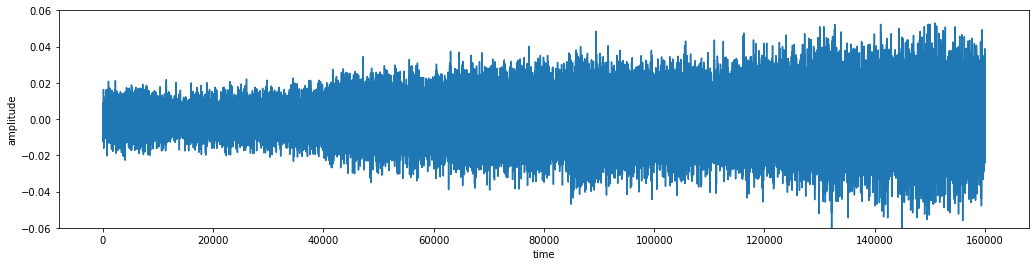

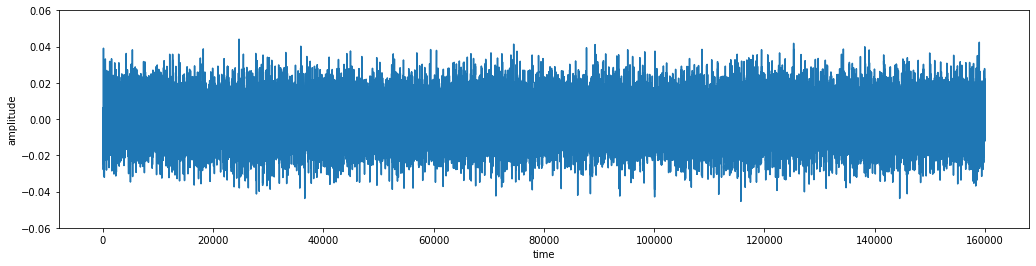

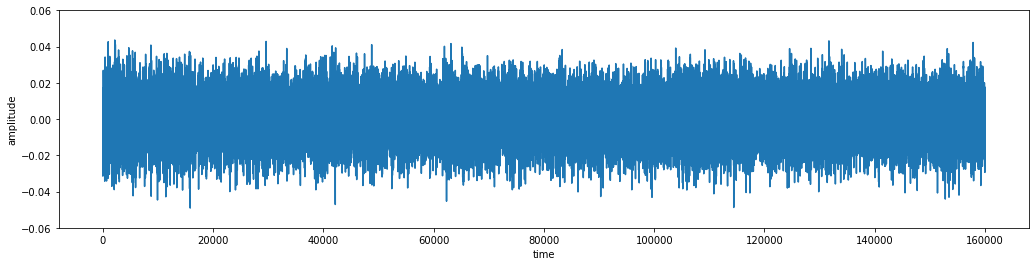

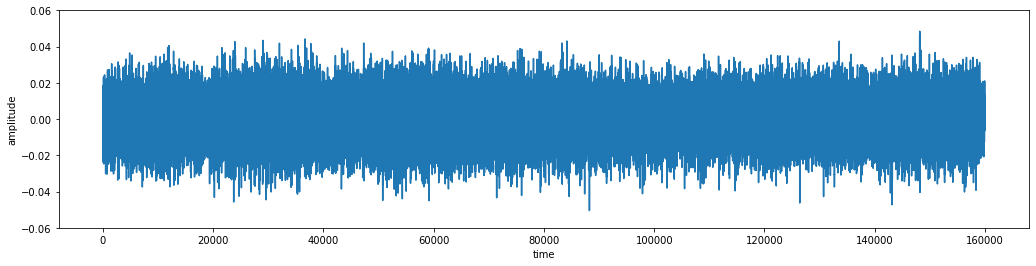

In [ ]:
for i in range(0,4):
  #num = '{03}'.format(i)
  num = str(i).zfill(3)
  normal, sr = librosa.load('./train_normal/' + num + '.wav', sr=None)
  plt.figure(figsize=(80,4))
  plt.subplot(1,4,i+1)
  plt.plot(normal)
  plt.xlabel("time")
  plt.ylabel("amplitude")
  plt.ylim([-0.06,0.06])
plt.show()

# 異常音の波形の可視化

## 高調波を作成

[0.00000000e+00 3.77028821e+00 7.54057643e+00 ... 3.76915713e+04
 3.76953416e+04 3.76991118e+04]


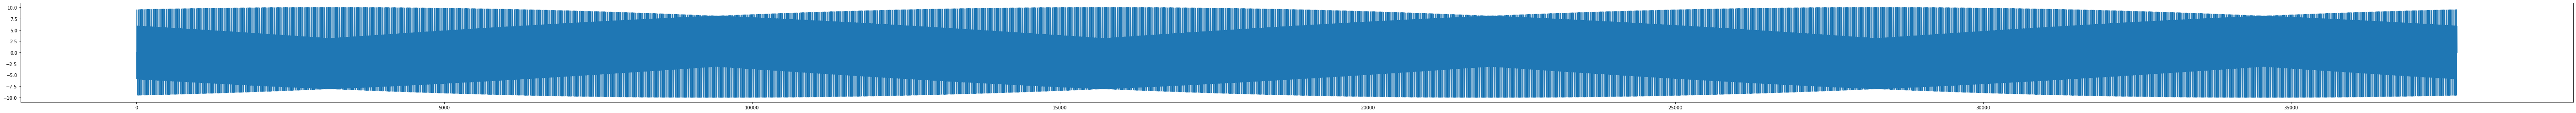

10000

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# x = np.linspace(0, 2*np.pi, 500) # np.pi:円周率　正弦波
x = np.linspace(0, 12000*np.pi, 10000) # np.pi:円周率　12000Hzの高調波
print(x)
plt.figure(figsize=(100,4))
plt.plot(x,10 * np.sin(x))
plt.show()

len(x)

## 異常音ファイルの読込、作為的に高調波を追加

In [ ]:
files = sorted(glob.glob("./valid_anomaly/*.wav"))
dataset = []
# それぞれのファイルを読み込み
for file_name in files:
    y, sr = librosa.load(file_name, sr = None)
    y[149999:159999] = y[149999:159999] + 0.06 * np.sin(x)
    # print(len(y))
    dataset.append(y)
# np.array型に変換
valid_ano = np.array(dataset)
valid_ano
# dataset

array([[-9.49096680e-03, -5.79833984e-03, -1.28479004e-02, ...,
         4.13584113e-02,  8.94165039e-03,  2.83813477e-03],
       [ 5.49316406e-03,  6.46972656e-03,  4.97436523e-03, ...,
         3.07993293e-02, -8.42285156e-03, -9.03320312e-03],
       [-1.66015625e-02, -1.21154785e-02, -8.30078125e-03, ...,
         3.68418097e-02, -3.05175781e-05, -9.46044922e-04],
       ...,
       [ 1.62048340e-02,  1.70288086e-02,  2.22778320e-02, ...,
         4.09311652e-02,  6.56127930e-03,  2.41088867e-03],
       [ 1.00708008e-03,  1.43432617e-03, -7.96508789e-03, ...,
         3.15622687e-02,  9.91821289e-03,  1.07727051e-02],
       [-1.77307129e-02, -1.20849609e-02, -6.56127930e-03, ...,
         3.36069465e-02, -3.54003906e-03, -4.18090820e-03]], dtype=float32)

# 異常音の可視化

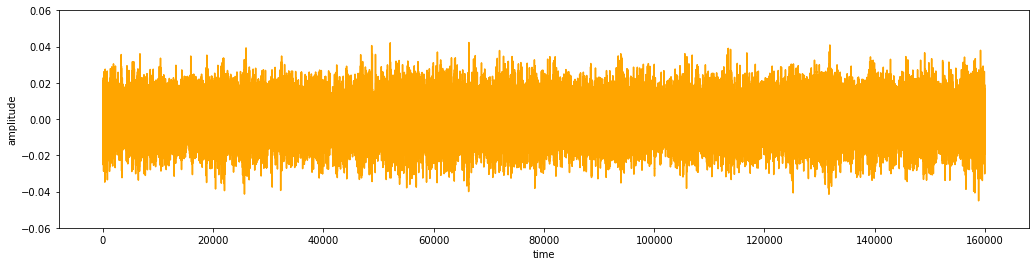

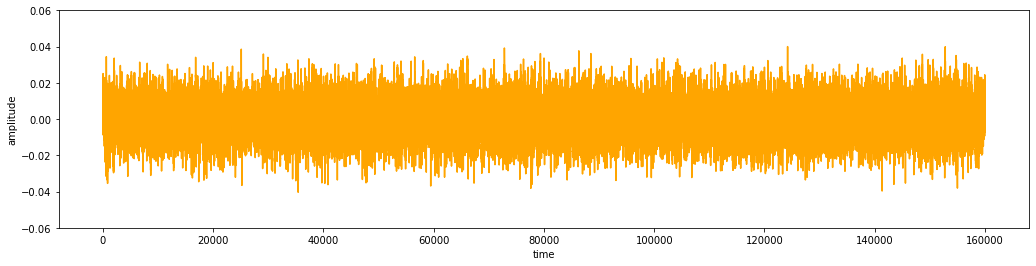

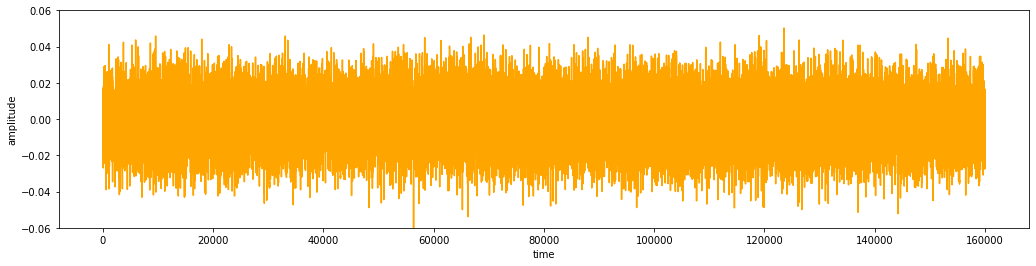

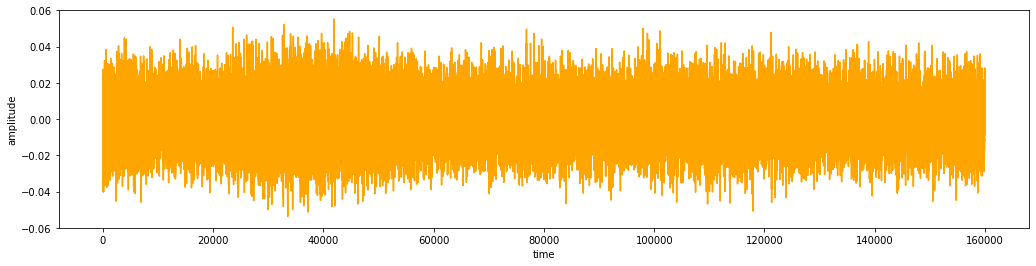

In [ ]:
for i in range(0,4):
  #num = '{03}'.format(i)
  num = str(i).zfill(3)
  anomaly, sr = librosa.load('./valid_anomaly/' + num + '.wav', sr=None)
  plt.figure(figsize=(80,4))
  plt.subplot(1,4,i+1)
  plt.xlabel("time")
  plt.ylabel("amplitude")
  plt.ylim([-0.06,0.06])
  plt.plot(anomaly, color='orange')
plt.show()

# 評価用正常音データの読込

In [ ]:
#評価用　正常音データの読込
files = sorted(glob.glob("./valid_normal/*.wav"))
dataset = []
# それぞれのファイルを読み込み
for file_name in files:
    y, sr = librosa.load(file_name, sr = None)
    dataset.append(y)
# np.array型に変換
valid_nor = np.array(dataset)
valid_nor

array([[ 0.00036621, -0.00439453, -0.00772095, ..., -0.01049805,
        -0.00784302, -0.00292969],
       [-0.00912476, -0.00854492, -0.00158691, ..., -0.01266479,
        -0.00952148, -0.01278687],
       [-0.00466919,  0.00036621,  0.00033569, ..., -0.01730347,
        -0.01553345, -0.01089478],
       ...,
       [-0.01486206, -0.02069092, -0.01538086, ..., -0.00247192,
         0.00811768,  0.0168457 ],
       [ 0.00762939,  0.00326538,  0.00488281, ...,  0.00280762,
         0.00537109,  0.00878906],
       [ 0.0005188 , -0.00613403, -0.01446533, ..., -0.02368164,
        -0.01657104, -0.0123291 ]], dtype=float32)

# 平均振幅や波形から違いを判断するのが難しい場合

よく使われる特徴量として、下記のようなものがある。  
１，パワースペクトル  
２，スぺクトログラム  
３，メルスペクトログラム  

## パワースペクトル（フーリエ変換）
音声波形は、通常複数の正弦波（sin波)で構成される  
即ち、音声波形の特徴=各sin波の特徴とも言える  
構成している正弦波に分解し、各正弦波の周波数と振幅に変換したものをパワースペクトルという  
<注意>時間軸の情報は失われる

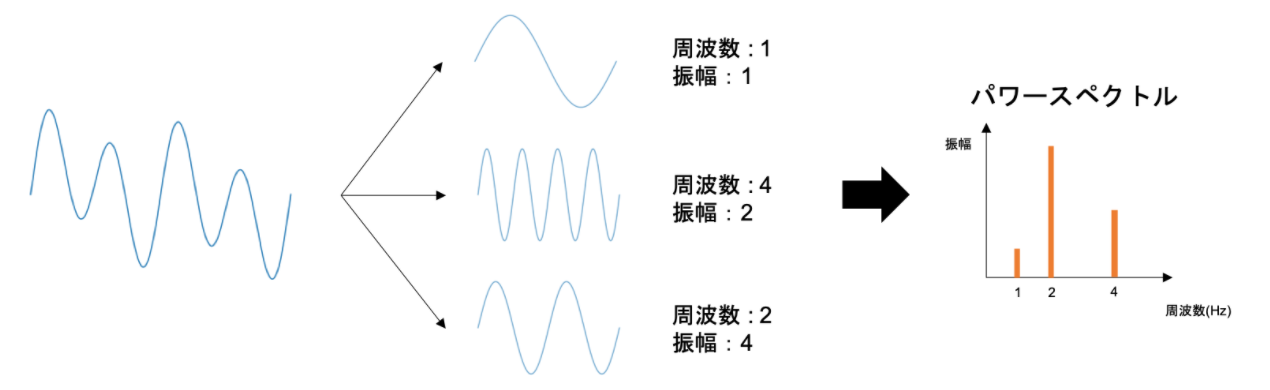

### パワースペクトルの作成
パワースペクトルを作成するには、フーリエ変換という処理を行う

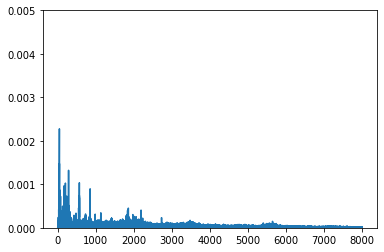

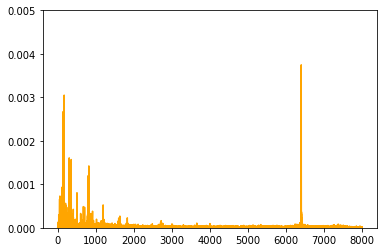

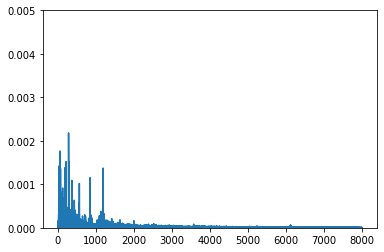

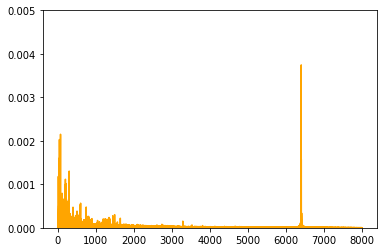

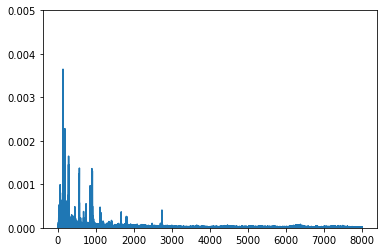

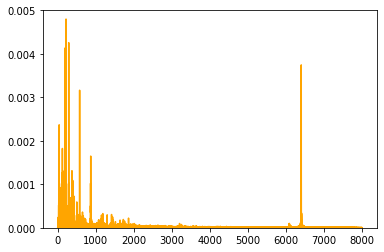

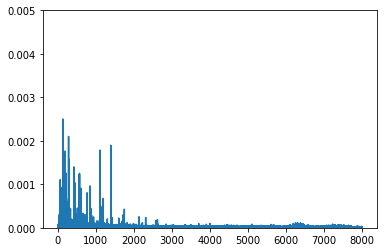

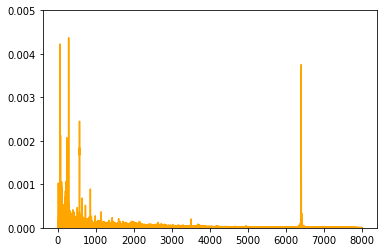

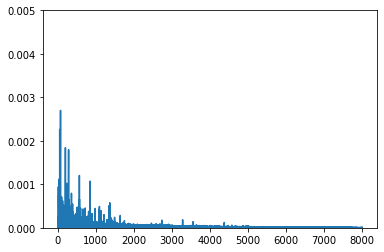

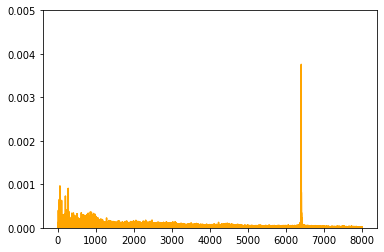

In [ ]:
def create_power_spectral(data):
    N = data.shape[1]
    dt = 10/N
    F = np.abs(np.fft.fft(data)/(N/2))
    fq = np.linspace(0,1/dt,N)
    return F[:,:int(N/2)+1], fq[:int(N/2)+1]

F, freq = create_power_spectral(train)
F2, freq2 = create_power_spectral(valid_ano)
for i in range(0,5):
  plt.ylim([0,0.005])
  plt.plot(freq,F[i])
  plt.show()
  plt.ylim([0,0.005])
  plt.plot(freq,F2[i], color='orange')
  plt.show()

＜考察＞
パワースペクトルの比較では、正常音に比べて、異常音の方では、作為的に追加した高調波が目立つ

＜参考文献＞  
フーリエ変換のライブラリ  
https://qiita.com/tom_m_m/items/91ba624dd8507bc0b746

## スペクトログラム

パワースペクトルには時間軸の情報が失われるという欠点がある  
そこで、パワースペクトルに時間情報を持たせるために、一定時間ごとにパワースペクトルを取ったもの```スペクトログラム```を使用する

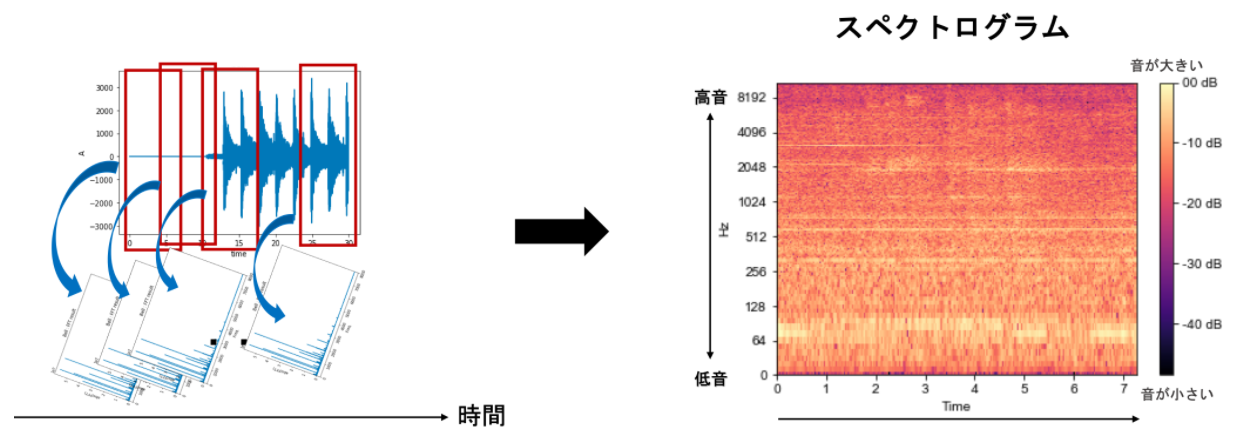

## メルスペクトログラム(短時間フーリエ変換)

スペクトログラムの縦軸は周波数でした。しかし人間はすべての周波数の違いを同じように感じているわけではない。低い周波数の音は、少しの周波数の違いでも感じれる一方で、高い周波数の音はある程度周波数が変わらないと違いを感じられない。

そこで、周波数の間隔を人が聞く感覚に近いように、低いところは細かく、高いところは粗く変換したものを**メル尺度**という。

スペクトログラムの周波数をメル尺度化したものを、**メルスペクトログラム**という

### メルスペクトログラムの作成
・ライブラリ```librosa```を使用  
・```librosa.feature.melspectrogram(X)```の返り値は```時間```ｘ```音の高さ```の２次元配列で、値は```音の大きさ（色の濃淡）```

160000
[-0.00195312  0.00018311  0.00149536 ... -0.02090454 -0.01574707
 -0.01330566]


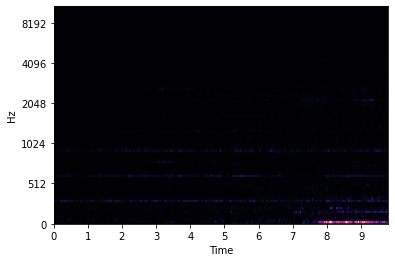

In [ ]:
import librosa
import librosa.display

# メルスペクトログラムの作成
print(len(train[0]))
print(train[0])
melspec = librosa.feature.melspectrogram(train[0], sr=16000, n_fft=1600, hop_length=380)
# 可視化
librosa.display.specshow(melspec, x_axis='time', y_axis='mel')
plt.show()

＜考察＞  
振幅の差があまりないため、明暗がはっきりしません

### デシベル変換

正常音


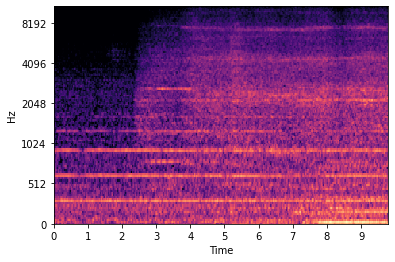

異常音


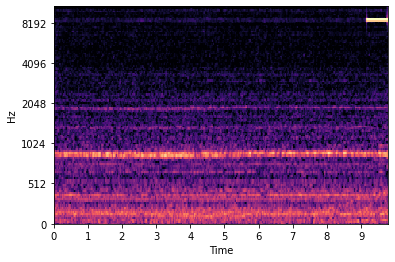

In [ ]:
# メルスペクトログラムの作成
melspec = librosa.feature.melspectrogram(train[0], sr=16000, n_fft=1600, hop_length=380)
test_melspec = librosa.feature.melspectrogram(valid_ano[0], sr=16000, n_fft=1600, hop_length=380)
# デシベル変換
melspec_db = librosa.amplitude_to_db(melspec)
test_melspec_db = librosa.amplitude_to_db(test_melspec)
# 可視化
print('正常音')
librosa.display.specshow(melspec_db, x_axis='time', y_axis='mel', )
plt.show()
print('異常音')
librosa.display.specshow(test_melspec_db, x_axis='time', y_axis='mel')
plt.show()

# print(melspec)
# print(melspec.shape)
# print(melspec_db)
# print(melspec_db.shape)

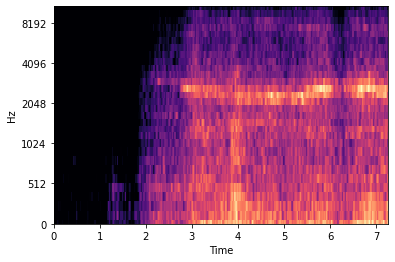

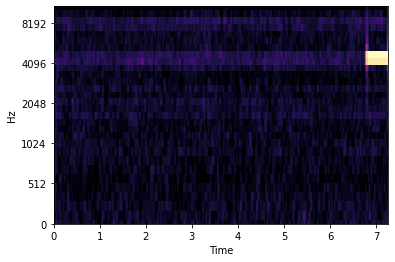

In [ ]:
pick_melspec_db = melspec_db[98:128, :313]
pick_melspec_db.shape
pick_test_melspec_db = test_melspec_db[98:128, :313]
pick_test_melspec_db.shape

# 可視化
# 正常音
librosa.display.specshow(pick_melspec_db, x_axis='time', y_axis='mel')
plt.show()
# 異常音
librosa.display.specshow(pick_test_melspec_db, x_axis='time', y_axis='mel')
plt.show()

## データ群に対するメルスペクトログラムの処理

In [ ]:
# 学習用データのDataFrameの作成
melspec_dbs = []
for i in range(len(train)):
    # メルスペクトログラムの作成
    melspec = librosa.feature.melspectrogram(train[i])
    # dB化
    # 高調波領域の抜粋するver
    melspec_db = librosa.amplitude_to_db(melspec)
    pick_melspec_db = melspec_db[98:128, :313].flatten()
    # データを１０個ずつ平均化
    pick_melspec_db = pick_melspec_db.reshape(-1, 10).mean(axis=1)
    melspec_dbs.append(pick_melspec_db.astype(np.float16))
    '''
    # 高調波領域の抜粋しないver
    melspec_db = librosa.amplitude_to_db(melspec).flatten()
    # データを１０個ずつ平均化
    pick_test_melspec_db = pick_test_melspec_db.reshape(-1, 10).mean(axis=1)
    melspec_dbs.append(melspec_db.astype(np.float16))
    '''
train_df = pd.DataFrame(melspec_dbs)

### Listを標準化してからDataFrameに入れる



In [ ]:
# from sklearn import preprocessing

# # ss = preprocessing.StandardScaler()

# # std = ss.fit_transform(melspec_dbs)

# print(preprocessing.scale(melspec_dbs, axis=1))
# train_df = pd.DataFrame(preprocessing.scale(melspec_dbs, axis=1))
# # train_df

[[-1.23007752 -1.2836943  -1.2769922  ... -0.68720764 -0.92178105
  -0.74082442]
 [ 1.53153753  0.96474214  1.70967322 ... -0.97855633 -0.97855633
  -0.97855633]
 [ 0.29040776 -0.14398199  0.0071101  ... -2.18372513 -2.59922837
  -1.84376794]
 ...
 [ 0.36349962 -0.01792849  0.12077264 ... -0.15662962 -0.15662962
  -0.15662962]
 [ 2.12389108  2.03881615  1.82612881 ... -0.8395525  -0.8395525
  -0.8395525 ]
 [ 1.35717181  1.13529921  1.53183748 ... -1.22032699 -1.22032699
  -1.22032699]]


In [ ]:
# ## 正常データと異常データの入れ込み

# # 評価データのDataFrameの作成
# test = np.concatenate([valid_nor,valid_ano])
# melspec_dbs = []
# for i in range(len(test)):
#     # メルスペクトログラムの作成
#     melspec = librosa.feature.melspectrogram(test[i])
#     # dB化
#     # 高調波領域の抜粋
#     melspec_db = librosa.amplitude_to_db(melspec)
#     pick_test_melspec_db = melspec_db[98:128, :313].flatten()
#     # データを１０個ずつ平均化
#     pick_test_melspec_db = pick_test_melspec_db.reshape(-1, 10).mean(axis=1)
#     melspec_dbs.append(pick_test_melspec_db.astype(np.float16))
#     '''
#     melspec_db = librosa.amplitude_to_db(melspec).flatten()
#     # データを１０個ずつ平均化
#     pick_test_melspec_db = pick_test_melspec_db.reshape(-1, 10).mean(axis=1)
#     melspec_dbs.append(melspec_db.astype(np.float16))
#     '''
# # test_df = pd.DataFrame(melspec_dbs)
# # test_df = pd.DataFrame(preprocessing.scale(melspec_dbs, axis=1))
# test_df = pd.DataFrame(sc.transform(melspec_dbs))
# # 学習ﾃﾞｰﾀの標準化指数を使用する

# test_df['label'] = np.concatenate([np.zeros(len(valid_nor)),np.ones(len(valid_ano))])

In [ ]:
# 異常データのみを評価

# 評価データのDataFrameの作成
test = valid_ano
melspec_dbs = []
for i in range(len(test)):
    # メルスペクトログラムの作成
    melspec = librosa.feature.melspectrogram(test[i])
    # dB化
    # 高調波領域の抜粋
    melspec_db = librosa.amplitude_to_db(melspec)
    pick_test_melspec_db = melspec_db[98:128, :313].flatten()
    # print(pick_test_melspec_db)
    # データを１０個ずつ平均化
    pick_test_melspec_db = pick_test_melspec_db.reshape(-1, 10).mean(axis=1)
    melspec_dbs.append(pick_test_melspec_db.astype(np.float16))
    '''
    melspec_db = librosa.amplitude_to_db(melspec).flatten()
    # データを１０個ずつ平均化
    pick_test_melspec_db = pick_test_melspec_db.reshape(-1, 10).mean(axis=1)
    melspec_dbs.append(melspec_db.astype(np.float16))
    '''
# test_df = pd.DataFrame(melspec_dbs)
# test_df = pd.DataFrame(preprocessing.scale(melspec_dbs, axis=1))
test_df = pd.DataFrame(sc.transform(melspec_dbs))
test_df['label'] = np.ones(len(valid_ano))

# AutoEncoderによる異常検知

AutoencoderはDeepLeraningの一種であり、一言で説明すると、「入力データを圧縮し、再度入力データに復元するネットワーク」です。

## AutoEncoderの作成

今回は、入力サイズ→64次元→8次元へ圧縮した後、8次元→64次元→出力サイズ（=入力サイズ)に復元

**正常波形を学習させて、正常音なら近似に復元可能。異常音なら復元できない。**

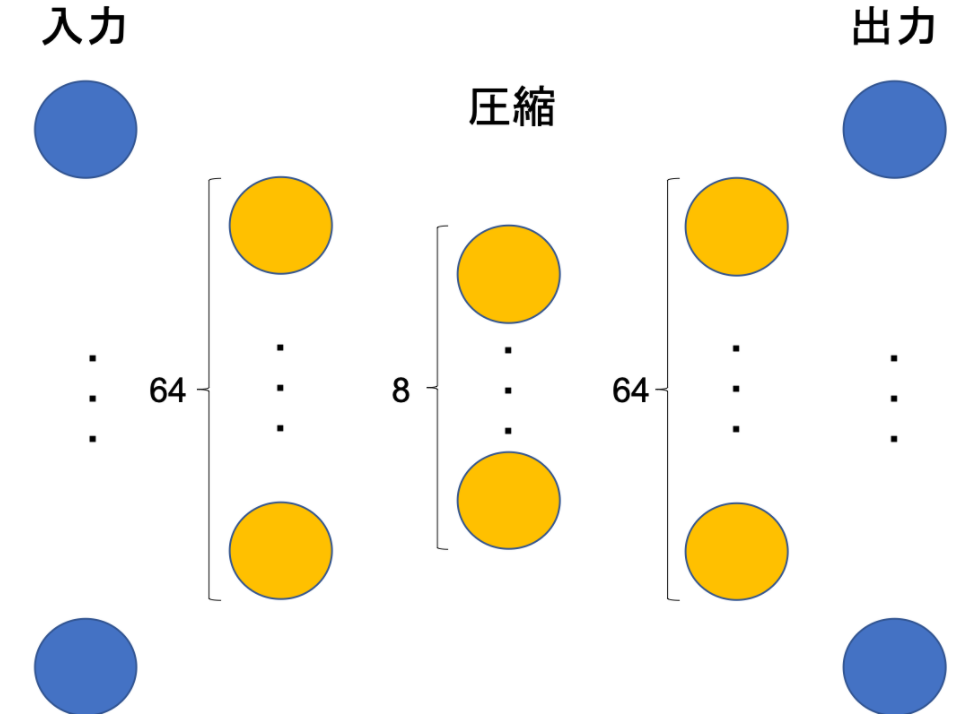

In [ ]:
# import keras.models
# from keras.models import Model
# from keras.layers import Input, Dense, BatchNormalization, Activation
# from keras.models import Sequential

# inputDim = 939
# model = Sequential()

# model.add(Dense(64,input_shape=(inputDim,)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(16))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(64))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Dense(inputDim))

In [ ]:
# model.compile(optimizer='adam',
#                        loss='mean_squared_error')

## 正常音を学習させる

In [ ]:
# history = model.fit(x=train_df,
#                              y=train_df,
#                              epochs=100,
#                              batch_size=10,
#                              validation_split=0.1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim  = 939

input = keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim)(decoded)

autoencoder = keras.Model(input, decoded)
optimizer= keras.optimizers.Adam(lr=0.001) #0.001
autoencoder.compile(optimizer=optimizer, loss='mse')

history = autoencoder.fit(train_df, train_df,
                epochs=100,
                batch_size=8,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
38/38 [==============================] - 1s 6ms/step - loss: 0.5944
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2413
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2088
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1897
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1824
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1531
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1417
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1620
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1339
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1278
Epoch 11/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1428
Epoch 12/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1317
Epoch 13/100
38/38 [=================

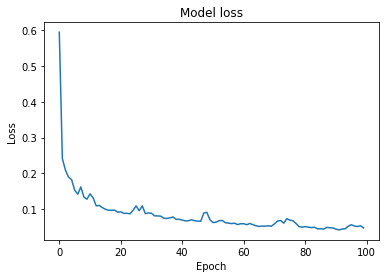

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 正常音の復元に対する異常度を確認

0      0.031234
1      0.030545
2      0.040227
3      0.058442
4      0.022421
         ...   
295    0.031383
296    0.040770
297    0.031772
298    0.020047
299    0.023507
Length: 300, dtype: float64


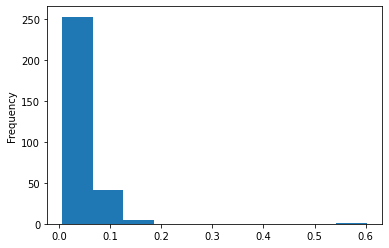

In [ ]:
train_X = train_df
test_X, test_y = test_df.drop(columns=['label']), test_df['label']

train_pred = autoencoder.predict(train_X)
# 異常度の算出
train_score = np.mean(np.square(train_X - train_pred), axis=1)
print(train_score)
#plt.plot(train_score)
train_score.plot.hist()
plt.show()

＜考察＞  
学習データの異常度のヒストグラムを描いてみると、0.～1.0ぐらいの値を取ることが分かる。この範囲内であれば、正常と判断することができるかもしれません

# 異常音の復元に対する異常度を確認

0.2
[[50]]
1.0


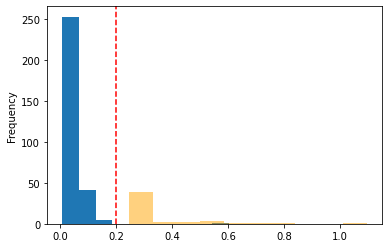

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_X = train_df
test_X, test_y = test_df.drop(columns=['label']), test_df['label']

# model = keras.models.load_model('model.h5', compile=False)
train_pred = autoencoder.predict(train_X)
train_score = np.mean(np.square(train_X- train_pred), axis=1)

test_pred = autoencoder.predict(test_X)
test_score = np.mean(np.square(test_X - test_pred), axis=1)

# 閾値の設定
# threshold = train_score.quantile(0.9) #学習データの大きいほうから１０％の値を閾値とする
threshold = 0.2 #学習データの大きいほうから１０％の値を閾値とする
print(threshold) 

# 異常度が閾値より大きければ1、小さければ0に
pred = np.where(test_score > threshold, 1, 0)
print(confusion_matrix(test_y,pred))
print(accuracy_score(test_y,pred)) # 正解率
train_score.plot.hist()
test_score.plot.hist(color='orange', alpha=0.5)
plt.axvline(x=threshold,color="red",linestyle="--")
plt.show()